In [33]:
import numpy as np
import descent
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib inline

# Introduction to the descent package

Let's say we want to optimize the following:

$$ \text{minimize}\quad f(x) $$

given a computable expression for $f(x)$ and $\nabla f(x)$.

## Organization

Descent contains a number of agorithms that can be used to perform unconstrained and constrained optimization. These algorithms are split into two types, the _first-order gradient-based algorithms_ and _proximal algorithms_.

Proximal algorithms:
- Proximal Consensus / Alternating direction method of multipliers (ADMM)
- Proximal gradient descent
- Accelerated proximal gradient descent

First-order gradient-based algorithms:
- Gradient descent (can be stochastic, with or without momentum)
- [Stochastic average gradient (SAG)](http://arxiv.org/abs/1309.2388)
- RMSProp
- [Adam](http://arxiv.org/abs/1412.6980)


## Toy example

For an introductory example, consider the following toy function (a quadratic):
$$ f(x) = \frac{1}{2} x^Tx $$

In [16]:
# quadratic in n-dimensions
def f_df(x):
    objective = 0.5 * x.T.dot(x)
    gradient = x
    return objective, gradient

In [17]:
# initial guess
x0 = np.random.randn(10)

In [18]:
# optimize with gradient descent
opt = descent.GradientDescent(f_df, x0, learning_rate=0.1)
opt.run()

tol: tolerance(obj=1e-18, param=1e-18, grad=1e-16)
+-------------------+--------------------+-------------------+
|Iteration          | Objective          | Iteration runtime |
+-------------------+--------------------+-------------------+
|                 1 |             3.7035 |         241.041 μs|
|                 2 |             2.9998 |         735.998 μs|
|                 3 |             2.4298 |          493.05 μs|
|                 4 |             1.9682 |         494.003 μs|
|                 5 |             1.5942 |         481.844 μs|
|                 6 |             1.2913 |          416.04 μs|
|                 7 |              1.046 |           382.9 μs|
|                 8 |            0.84724 |         444.889 μs|
|                 9 |            0.68626 |         433.922 μs|
|                10 |            0.55587 |         428.915 μs|
|                11 |            0.45026 |          367.88 μs|
|                12 |            0.36471 |         377.893 μs|
|   

The learned parameters are stored in the `theta` property:

In [20]:
opt.theta

array([  3.03149519e-17,   1.18972794e-16,   5.15283918e-17,
        -7.16830424e-17,  -1.31622359e-16,  -3.14065686e-18,
         3.58040169e-17,  -7.45062571e-17,  -3.98644387e-17,
        -1.91490832e-16])

By default, the objective function at every iteration is stored in a list, and accessed through the `storage` interface:

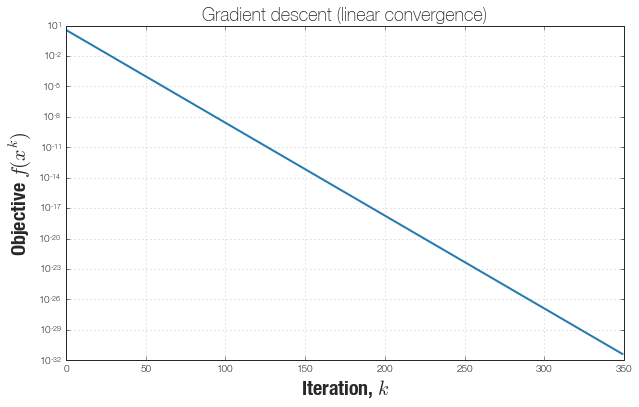

In [21]:
plt.figure(figsize=(10,6))
plt.semilogy(opt.storage.get('obj'))
plt.xlabel('Iteration, $k$', fontsize=20)
plt.ylabel('Objective $f(x^k)$', fontsize=20)
plt.title('Gradient descent (linear convergence)', fontsize=18)

## Proximal operators

See the `descent.proximal_operators` module

For example, here is the proximal operator for the $\ell_1$-norm, with $\lambda = 0.1$ (the soft thresholding function):

In [25]:
# get the proximal operator
proxop = descent.proximal_operators.sparse(penalty=0.1)

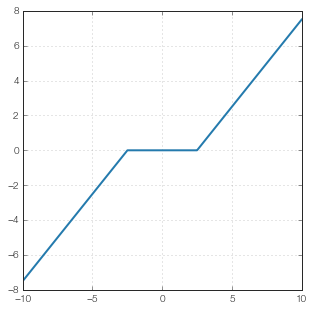

In [34]:
# apply it to a vector
@interact(rho=(0.01, 0.1, 0.01))
def plot_prox(rho=0.05):

    x = np.linspace(-10,10,1e3)
    y = proxop(x, rho)

    plt.figure(figsize=(5,5))
    plt.plot(x,y)

Here is another example, the proximal operator for the nuclear norm (penalty encourages low-rank solutions):

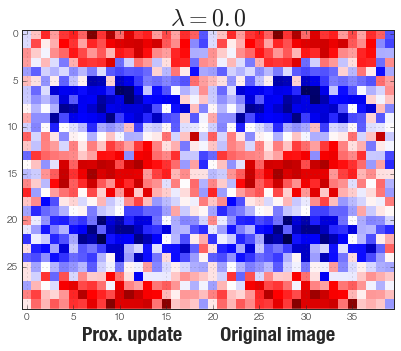

In [58]:
# apply it to a matrix
u = np.cos(4*np.linspace(0,np.pi,30))
v = np.sin(np.linspace(0,np.pi,20))
X = np.outer(u, v) + 0.3 * np.random.randn(30,20)
rho = 1.

@interact(penalty=(0.0, 5.0, 0.5))
def plot_prox(penalty=0.05):

    proxop = descent.proximal_operators.nucnorm(penalty=penalty)
    X_lr = proxop(X, rho)

    plt.figure(figsize=(10,5))
    plt.title('$\lambda = {}$'.format(penalty), fontsize=24)
    plt.imshow(np.hstack([X_lr, X]), aspect='equal', cmap='seismic')
    plt.xlabel('Prox. update        Original image', fontsize=20)